In [ ]:
# Lab 5: Clustering Techniques Using DBSCAN and Hierarchical Clustering
**Student Name**: Shashwat Baral
**Course**: MSCS-634-B01 - Advanced Big Data and Data Mining
**Term**: Summer 2025 (Second Bi-term)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

In [4]:
# Load the Wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)

In [5]:
# Explore dataset
print("Shape of dataset:", X.shape)
print("\nFirst 5 rows:")
print(X.head())
print("\nData info:")
print(X.info())
print("\nSummary statistics:")
print(X.describe())

Shape of dataset: (178, 13)

First 5 rows:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_d

In [7]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

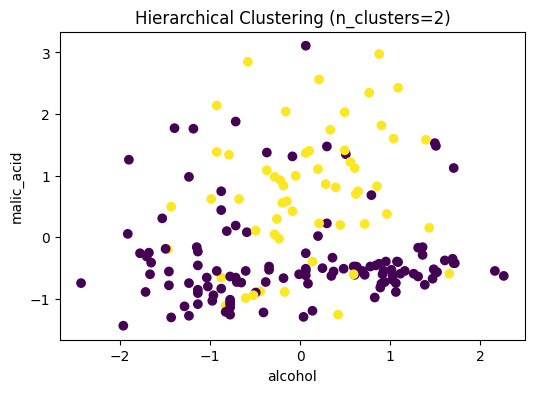

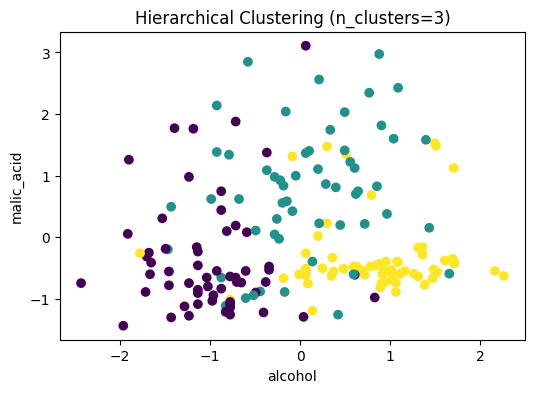

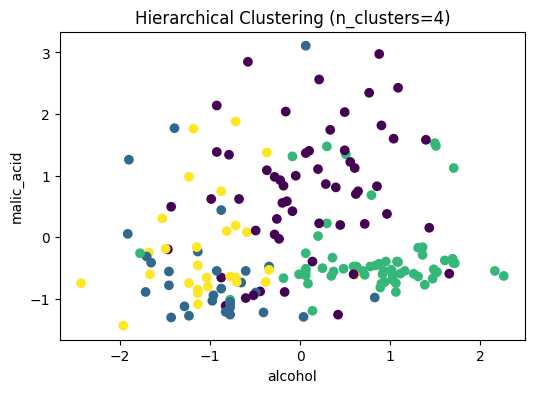

In [8]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Try Agglomerative Clustering with different cluster counts
for n in [2, 3, 4]:
    model = AgglomerativeClustering(n_clusters=n)
    labels = model.fit_predict(X_scaled)
    plt.figure(figsize=(6,4))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
    plt.title(f'Hierarchical Clustering (n_clusters={n})')
    plt.xlabel(wine.feature_names[0])
    plt.ylabel(wine.feature_names[1])
    plt.show()

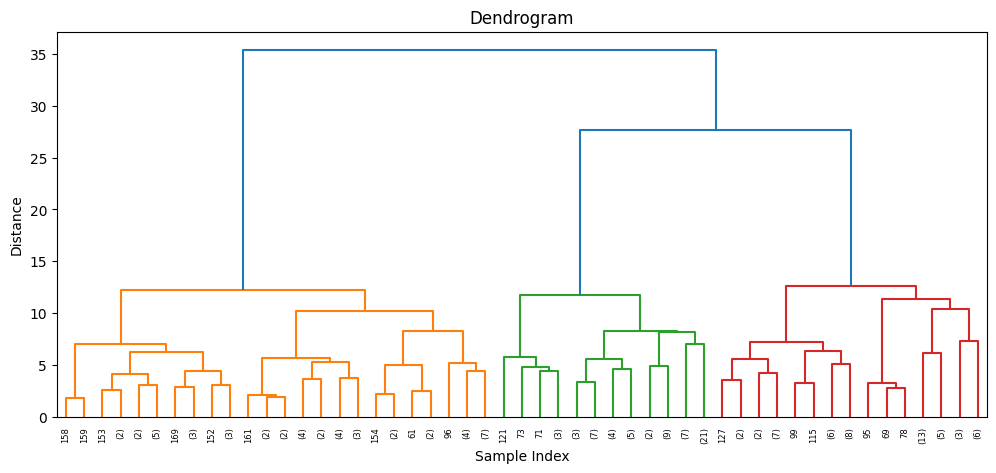

In [9]:
# Dendrogram
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 5))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

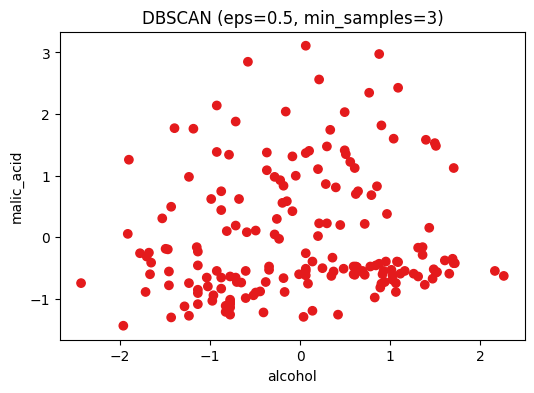

eps=0.5, min_samples=3
Silhouette Score: Not defined (bad clustering)
Homogeneity Score: Not defined (bad clustering)
Completeness Score: Not defined (bad clustering)
----------------------------------------


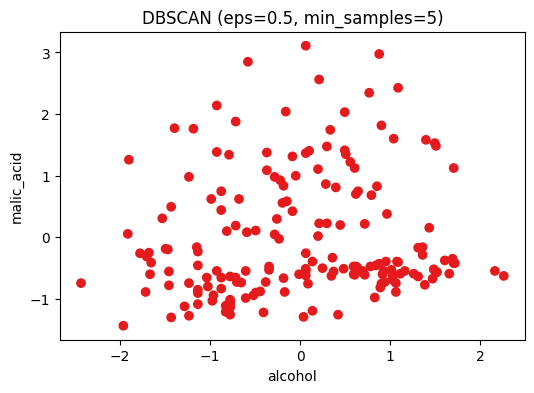

eps=0.5, min_samples=5
Silhouette Score: Not defined (bad clustering)
Homogeneity Score: Not defined (bad clustering)
Completeness Score: Not defined (bad clustering)
----------------------------------------


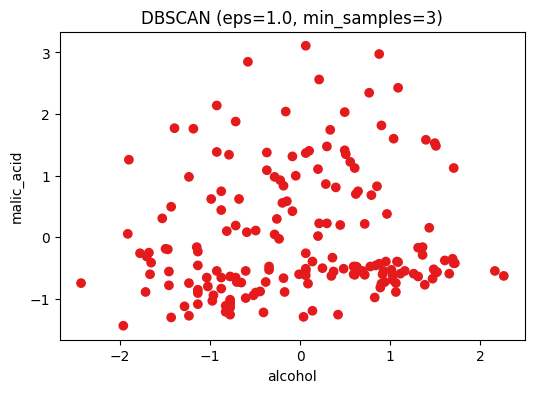

eps=1.0, min_samples=3
Silhouette Score: Not defined (bad clustering)
Homogeneity Score: Not defined (bad clustering)
Completeness Score: Not defined (bad clustering)
----------------------------------------


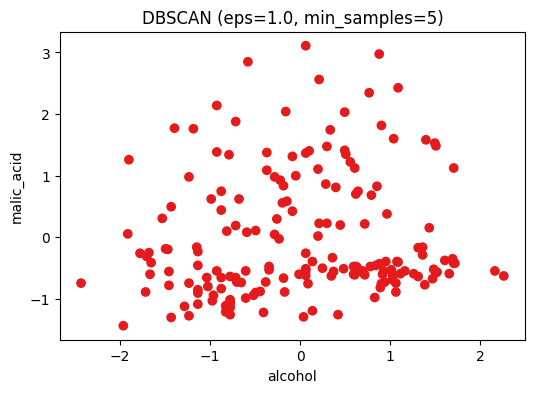

eps=1.0, min_samples=5
Silhouette Score: Not defined (bad clustering)
Homogeneity Score: Not defined (bad clustering)
Completeness Score: Not defined (bad clustering)
----------------------------------------


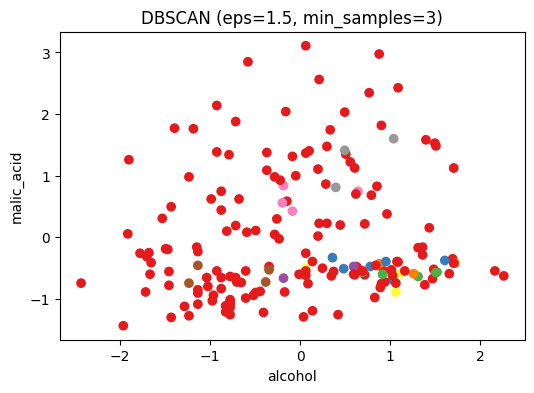

eps=1.5, min_samples=3
Silhouette Score: -0.27676901365193624
Homogeneity Score: 0.1891785265073548
Completeness Score: 0.25101521335346144
----------------------------------------


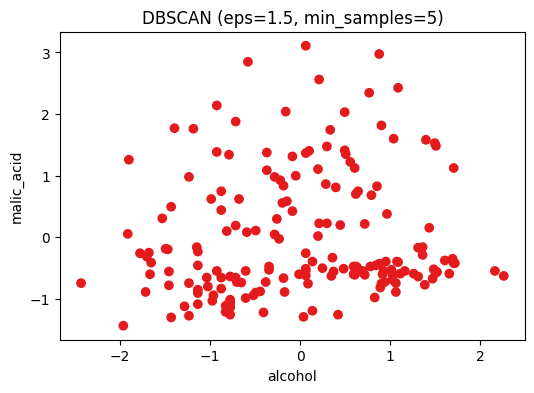

eps=1.5, min_samples=5
Silhouette Score: Not defined (bad clustering)
Homogeneity Score: Not defined (bad clustering)
Completeness Score: Not defined (bad clustering)
----------------------------------------


In [10]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score

# Try DBSCAN with different eps and min_samples
eps_values = [0.5, 1.0, 1.5]
min_samples_values = [3, 5]

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X_scaled)

        # Visualize
        plt.figure(figsize=(6, 4))
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='Set1')
        plt.title(f'DBSCAN (eps={eps}, min_samples={min_samples})')
        plt.xlabel(wine.feature_names[0])
        plt.ylabel(wine.feature_names[1])
        plt.show()

        # Evaluation Metrics
        if len(set(labels)) > 1 and len(set(labels)) < len(X):  # meaningful clusters
            sil_score = silhouette_score(X_scaled, labels)
            homo_score = homogeneity_score(y, labels)
            comp_score = completeness_score(y, labels)
        else:
            sil_score = homo_score = comp_score = 'Not defined (bad clustering)'

        print(f"eps={eps}, min_samples={min_samples}")
        print("Silhouette Score:", sil_score)
        print("Homogeneity Score:", homo_score)
        print("Completeness Score:", comp_score)
        print("-" * 40)
